In [5]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
data=pd.read_csv("train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
data.isnull().sum()[:2000]

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
data.shape

(2000, 21)

In [17]:
data.size

42000

In [18]:
x=data.drop(['price_range'],axis=1)
y=data['price_range']

In [19]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('X \n' , x[:10])
print('y \n' , y[:10])

X 
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0,shuffle=True)

In [24]:
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",x_test.shape)

x_train shape (1400, 20)
y_train shape (1400,)
x_test shape (600, 20)
y_test shape (600, 20)


In [30]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=7,random_state=0) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9728571428571429
RandomForestClassifierModel Test Score is :  0.8333333333333334
RandomForestClassifierModel features importances are :  [0.07450278 0.00338619 0.01753514 0.00419805 0.01544974 0.00305605
 0.02903072 0.01567405 0.02750854 0.01680166 0.01885337 0.05505041
 0.05168275 0.60053798 0.01549335 0.02255629 0.01828581 0.00281392
 0.0038983  0.00368489]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [3 0 2 1 3 0 0 3 3 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.05100066 0.07770507 0.1690815  0.70221278]
 [0.84770702 0.09458363 0.04284752 0.01486183]
 [0.08393002 0.12706744 0.57252122 0.21648132]
 [0.16335214 0.49325667 0.25974011 0.08365107]
 [0.09799398 0.16577056 0.30759612 0.42863934]
 [0.79906463 0.13456035 0.04575338 0.02062164]
 [0.62038012 0.22051363 0.10956789 0.04953835]
 [0.05832521 0.09102337 0.35033924 0.50031218]
 [0.07091415 0.1

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=0) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.9571428571428572
DecisionTreeClassifierModel Test Score is :  0.8383333333333334
DecisionTreeClassifierModel Classes are :  [0 1 2 3]
DecisionTreeClassifierModel feature importances are :  [0.10642128 0.         0.00644532 0.00304769 0.         0.
 0.01094206 0.         0.00297016 0.00518338 0.00270136 0.09395942
 0.07936809 0.68060308 0.         0.00434218 0.00204737 0.0019686
 0.         0.        ]
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [3 0 2 2 3 0 0 3 3 1]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.         0.         0.         1.        ]
 [0.98717949 0.01282051 0.         0.        ]
 [0.         0.02702703 0.97297297 0.        ]
 [0.         0.07407407 0.92592593 0.        ]
 [0.         0.         0.         1.        ]
 [0.98717949 0.01282051 0.         0.        ]
 [0.98717949 0.01282051 0.         0.        ]
 [0.         0.     

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix is : 
 [[141  10   0   0]
 [ 13 108  14   0]
 [  0  20 109  22]
 [  0   0  18 145]]


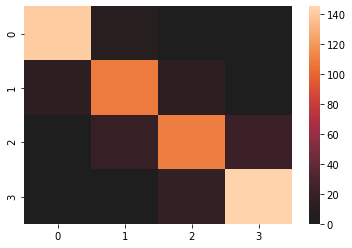

In [40]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [41]:

from sklearn.metrics import f1_score

In [42]:
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.8383333333333334
